# Testing `peth`

### Using the custom `plotters` function to get combinations of inputs for SEDS

In [1]:
from pynwb import NWBHDF5IO
import nwbwidgets
import os;
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# custom code
path_added = os.path.split(os.path.split(os.getcwd())[0])[0]; os.chdir(path_added); print("Added path:",path_added)
import rootfun as rf # we can import this if our cwd is local
import nwbfun
import plotters
root = rf.dropbox_root(dropbox_folder='timspellman')

Added path: c:\Users\johnj\SpellmanLab Dropbox\timspellman\Python\John\PySpell\code


The code below uses the data from NWB to organize the data into various combinations of trial variables

In [2]:
nwbpath = os.path.join(root,r"timspellman\Python\John\PySpell\code\Projects\Test Data\t284_SEDS2_L5.nwb")
stat, ops, F, Fneu, spks, iscell, probcell, redcell, probredcell = nwbfun.suite2p_nwb().read_nwb(fpath=nwbpath);
behdict = nwbfun.unwrap().spellmanBeh(nwbpath=nwbpath)
time_around=[10,10] # time around event marker for PETH

# this should be under a different function name
peth = plotters.seds_peth(neural_data = spks[iscell,:], fs=ops['fs'], behdata=behdict, time_around=[10,10]);

trialStartTimes detected
rewardTimes detected
stimOnTimes detected
stimOffTimes detected
lickTimesL detected
lickTimesR detected
rewardTimesIdxTrials detected


The attributes of `peth` represent how the neural data is centered.

`peth['stimOnTimestrialCorrect']` provides a view of the neural data surrounding stimulus onset, but specifically on correct trials

The `shape` of `peth` is the following: `(TRIALS, COMPONENTS, TIMEPOINTS)`

---

Lets look at one component

Text(0.5, 0, 'Time Around stim-onset')

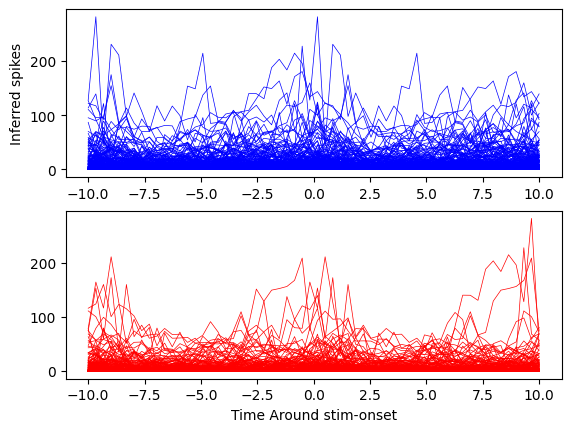

In [3]:
# number of components and number of times are fixed
num_components = peth['stimOnTimestrialCorrect'].shape[1]
num_times      = peth['stimOnTimestrialCorrect'].shape[2]

# using the number of time points and the known `time_around` used in `seds_peth`, we can create an x-axis
x_axis = np.linspace(-time_around[0],time_around[1],num_times)

# number of trials varies with variable
num_trials = peth['stimOnTimestrialCorrect'].shape[0]
num_trials_inc = peth['stimOnTimestrialIncorrect'].shape[0]

# create a figure object to assign our data to
fig, ax = plt.subplots(nrows=2, ncols=1)

# plot
for i in range(num_trials):
    ax[0].plot(x_axis,peth['stimOnTimestrialCorrect'][i,100,:],color='blue',linewidth=0.5)

for i in range(num_trials_inc):
    ax[1].plot(x_axis,peth['stimOnTimestrialIncorrect'][i,100,:],color='red',linewidth=0.5)

ax[0].set_ylabel("Inferred spikes")
ax[1].set_xlabel("Time Around stim-onset")

Now lets compare the results above to what we would see if we generated things with the raw data

In [4]:
import scipy.io as sio

# paths for data
fpath = os.path.join(root,r"timspellman\Imaging\PFCMDTReanalysis\Imaging\t284\SEDS2\suite2p\plane0")
bpath = os.path.join(root,r"timspellman\Behavior2P_Archive\t284\SEDS2Beh.mat")

# load suite2p variables
ops      = np.load(os.path.join(fpath,'ops.npy'), allow_pickle=True).item(); ops.keys() == ops.keys() # options
stat     = np.load(os.path.join(fpath,'stat.npy'),allow_pickle=True) # statistics
iscell   = np.load(os.path.join(fpath,'iscell.npy'),allow_pickle=True)[:, 0].astype(bool) # index for cell or not
F        = np.load(os.path.join(fpath,'F.npy'),allow_pickle=True)    # f of cells
Fneu     = np.load(os.path.join(fpath,'Fneu.npy'),allow_pickle=True) # f of neuropil
spks     = np.load(os.path.join(fpath,'spks.npy'),allow_pickle=True) # spk via deconvolution

# load behavior
behdict = sio.loadmat(bpath)
time_around=[10,10] # time around event marker for PETH
fs = 3.0

# this should be under a different function name
peth_onraw = plotters.seds_peth(neural_data = spks[iscell,:], fs=fs, behdata=behdict, time_around=[10,10]);

trialStartTimes detected
rewardTimes detected
stimOnTimes detected
stimOffTimes detected
lickTimesL detected
lickTimesR detected


Using the same exact code as above, we can see that the plots are the same

Text(0.5, 0, 'Time Around stim-onset')

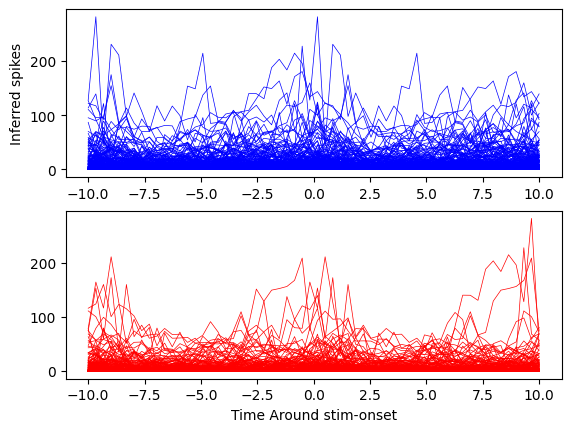

In [5]:
# number of components and number of times are fixed
num_components = peth_onraw['stimOnTimestrialCorrect'].shape[1]
num_times      = peth_onraw['stimOnTimestrialCorrect'].shape[2]

# using the number of time points and the known `time_around` used in `seds_peth`, we can create an x-axis
x_axis = np.linspace(-time_around[0],time_around[1],num_times)

# number of trials varies with variable
num_trials = peth_onraw['stimOnTimestrialCorrect'].shape[0]
num_trials_inc = peth_onraw['stimOnTimestrialIncorrect'].shape[0]

# create a figure object to assign our data to
fig, ax = plt.subplots(nrows=2, ncols=1)

# plot
for i in range(num_trials):
    ax[0].plot(x_axis,peth_onraw['stimOnTimestrialCorrect'][i,100,:],color='blue',linewidth=0.5)

for i in range(num_trials_inc):
    ax[1].plot(x_axis,peth_onraw['stimOnTimestrialIncorrect'][i,100,:],color='red',linewidth=0.5)

ax[0].set_ylabel("Inferred spikes")
ax[1].set_xlabel("Time Around stim-onset")

As an added sanity check, lets directly compare the plots by subtracting the NWB from the raw data files

The results should be **A FLAT LINE!!**

Text(0.5, 1.0, 'Sanity checking NWB conversion against raw data. Look for flat line')

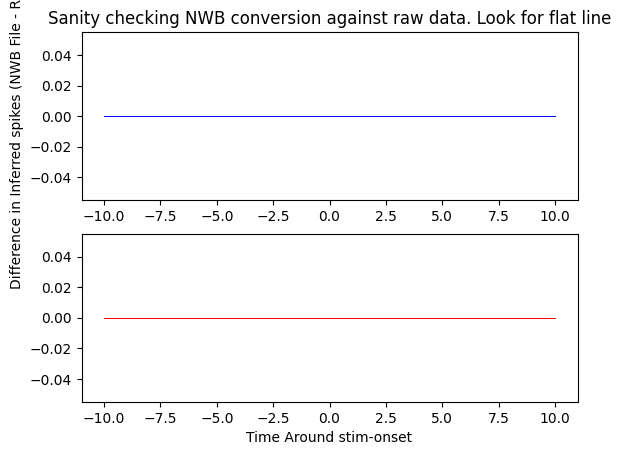

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1)

# plot
for i in range(num_trials):
    ax[0].plot(x_axis,peth['stimOnTimestrialCorrect'][i,100,:]-peth_onraw['stimOnTimestrialCorrect'][i,100,:],color='blue',linewidth=0.5)

for i in range(num_trials_inc):
    ax[1].plot(x_axis,peth['stimOnTimestrialIncorrect'][i,100,:]-peth_onraw['stimOnTimestrialIncorrect'][i,100,:],color='red',linewidth=0.5)

ax[0].set_ylabel("Difference in Inferred spikes (NWB File - RAW File)")
ax[1].set_xlabel("Time Around stim-onset")
ax[0].set_title("Sanity checking NWB conversion against raw data. Look for flat line")

ShadedErrorBar equivalent plots

Text(0.5, 0, 'Time around reward from correct trials')

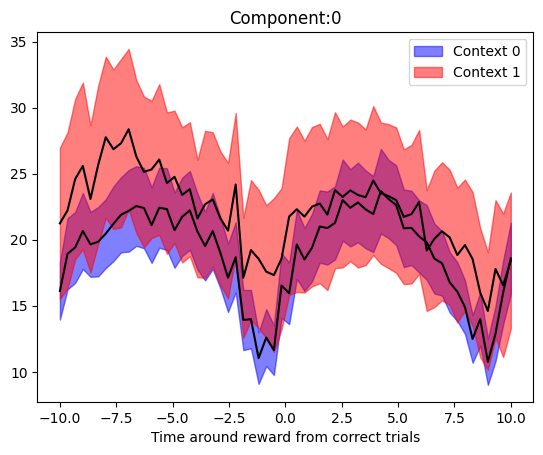

In [44]:
from scipy.stats import sem

# take the average over trials
avg_peth_c0   = np.mean(peth['rewardTimesIdxTrialssetID_0_correct'],axis=0)
avg_peth_c1 = np.mean(peth['rewardTimesIdxTrialssetID_1_correct'],axis=0)

sem_peth_c0   = sem(peth['rewardTimesIdxTrialssetID_0_correct'],axis=0)
sem_peth_c1 = sem(peth['rewardTimesIdxTrialssetID_1_correct'],axis=0)

# time around
times = np.linspace(-time_around[0],time_around[1],avg_peth_c0.shape[1])

# choose your component
comp = 0

# make your figure
plt.plot(times, avg_peth_c0[comp,:], 'k-')
plt.plot(times, avg_peth_c1[comp,:], 'k-')

plt.fill_between(times, avg_peth_c0[comp,:] - sem_peth_c0[comp,:], avg_peth_c0[comp,:] + sem_peth_c0[comp,:], color='b', alpha = 0.5, label='Context 0')
plt.fill_between(times, avg_peth_c1[comp,:] - sem_peth_c1[comp,:], avg_peth_c1[comp,:] + sem_peth_c1[comp,:], color='r', alpha = 0.5, label='Context 1')

plt.legend()
plt.title(("Component:"+str(comp)))

plt.xlabel("Time around reward from correct trials")

Z-score transform your signal prior to plotting

When you z-score over time, separately for each trial, then average, you are essentially weighting activity from each trial as similar. But there are clear cases of large fluctuations in signals, then small fluctuating signals. These small fluctuating signals are still calcium events. 

When we compare this to ephys, trial 1 has 3Hz, but trial 10 has 10Hz. Taking a trial average would land at some common firing rate over trial. 
If trial 1 3Hz activity is time locked similarly as trial 10, 10Hz, then z-scoring is no issue. For example, if they both occured at the time corresponding to choice. If we weight them similarly over trials, this doesn't seem problematic.

But what happens when trial 1 3Hz happens somewhere different from trial 10, 10Hz? Trial 1 3Hz is the peak, happening at trial onset, but trial 10, 10Hz, is the peak, happening at choice. Now we z-score each trial separately, then average over trials. We squash the 10Hz despite its preferential activity.


On the flip side of this, if calcium transients vary so significantly over trials, having some normalization will help reduce variability in signal magnitude.



What if instead of normalizing/standardizing over time, per each trial, we do this for the full signal? This puts each component on a similar playing field, which might be beneficial. But this also ignores the fact that some cells will inherently be more active than other cells.

I'm wondering if just leaving the inferred spikes alone is the way to go. We make less assumptions. 


- Talk to Tim

Text(0.5, 0, 'Time around reward from correct trials')

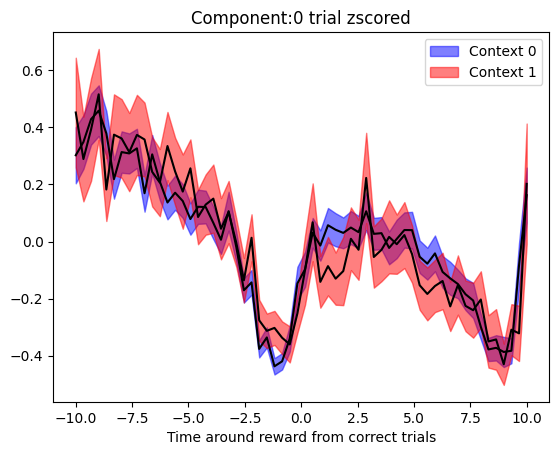

In [45]:
from scipy.stats import zscore

# zscore each component over the time dimension, separately for each trial
z_rewc0 = zscore(peth['rewardTimesIdxTrialssetID_0_correct'],axis=2)
z_rewc1 = zscore(peth['rewardTimesIdxTrialssetID_1_correct'],axis=2)

# take the average over trials
avg_peth_c0  = np.mean(z_rewc0, axis=0)
avg_peth_c1  = np.mean(z_rewc1, axis=0)

# take sem over trials
sem_peth_c0 = sem(z_rewc0, axis=0)
sem_peth_c1 = sem(z_rewc1, axis=0)

# make your figure
plt.plot(times, avg_peth_c0[comp,:],   'k-')
plt.plot(times, avg_peth_c1[comp,:], 'k-')

plt.fill_between(times, avg_peth_c0[comp,:] - sem_peth_c0[comp,:], avg_peth_c0[comp,:] + sem_peth_c0[comp,:], color='b', alpha = 0.5, label='Context 0')
plt.fill_between(times, avg_peth_c1[comp,:] - sem_peth_c1[comp,:], avg_peth_c1[comp,:] + sem_peth_c1[comp,:], color='r', alpha = 0.5, label='Context 1')

plt.legend()
plt.title(("Component:"+str(comp)+" trial zscored"))

plt.xlabel("Time around reward from correct trials")